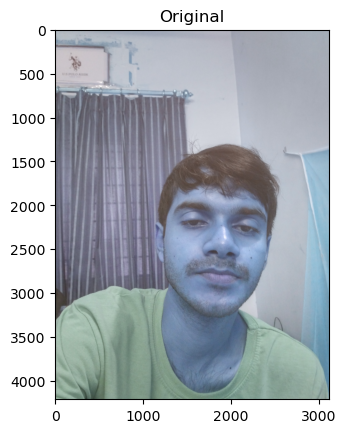

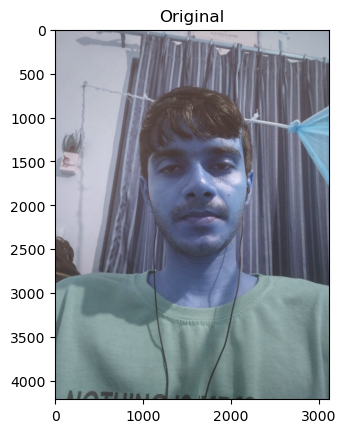

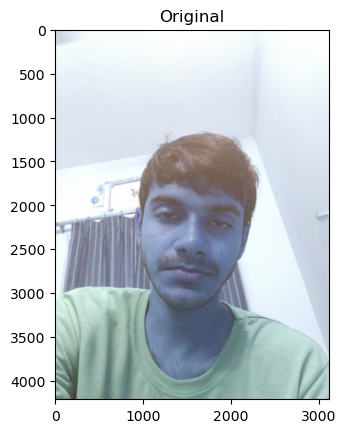

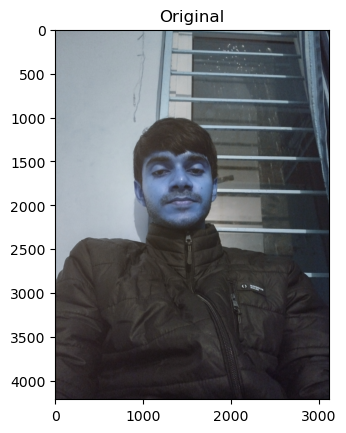

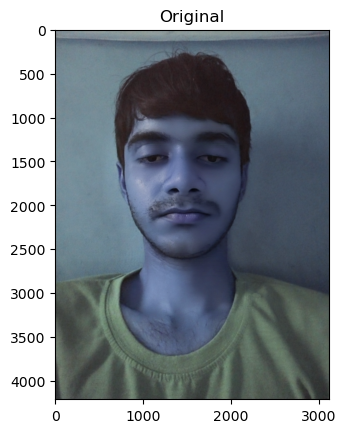

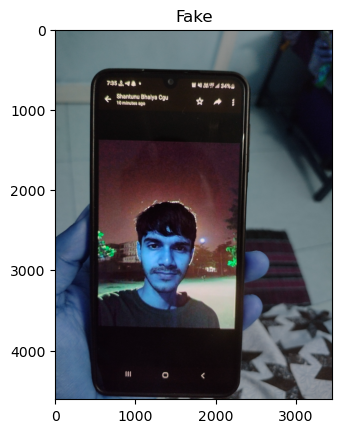

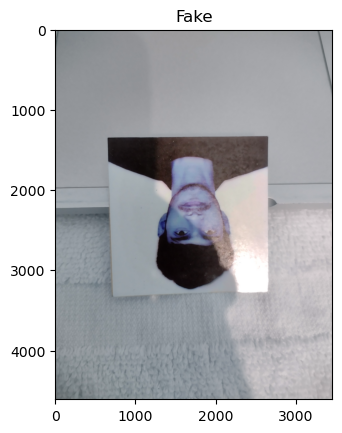

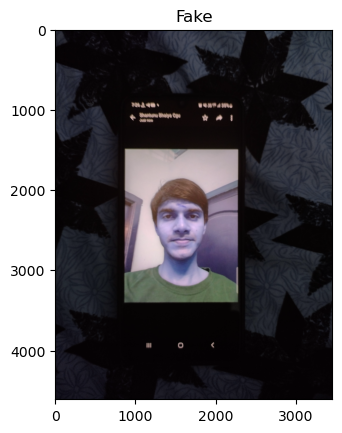

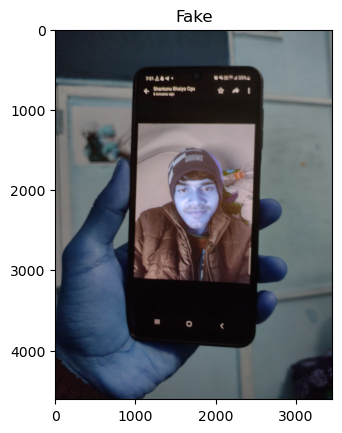

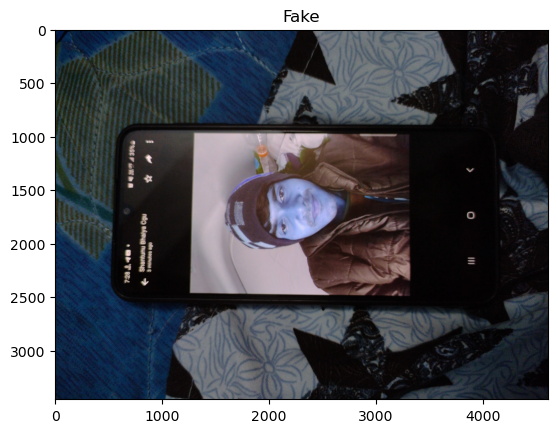

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.filterwarnings("ignore")

DATADIR = r"/Users/san5h0llow/Data_science/Face_recognition/Data_Set/"
CATEGORIES = ["Original","Fake"]

for i in CATEGORIES:
    path = os.path.join(DATADIR,i)
    j=0
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img))
        plt.imshow(img)
        plt.title(("Original" if i == "Original" else "Fake"))
        plt.show()
        j+=1
        if j == 5:
            break

In [2]:
IMG_SIZE = 180
training_data = []

def create_training_data():
    for i in CATEGORIES:
        path = os.path.join(DATADIR,i)
        class_num = CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [3]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0
X = X.reshape(-1,180,180,1)

(3231, 180, 180)


In [4]:
X = np.array(X)
X.shape


(3231, 180, 180, 1)

In [5]:
y = np.array(y)
y.shape

(3231,)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("The shape of the X_train: "+str(X_train.shape))
print("The size of the X_trian: "+str(X_train.shape[0]))
print("The size of the X_test: "+str(X_test.shape))
print("The size of the X_test: "+str(X_test.shape[0]))

The shape of the X_train: (2584, 180, 180, 1)
The size of the X_trian: 2584
The size of the X_test: (647, 180, 180, 1)
The size of the X_test: 647


In [7]:
import tensorflow as tf
import cv2 
from tensorflow import keras
from tensorflow.keras import layers, Input
from keras.layers import InputLayer, MaxPooling2D , Flatten , Dense , Conv2D , Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.resnet50 import preprocess_input , decode_predictions, ResNet50
from tensorflow.keras.optimizers import Adam, SGD
# SKlearn Unit 
from sklearn.utils import shuffle
#Matplotlib Unit 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot
from sklearn.preprocessing import StandardScaler

In [8]:
def model(input_shape):
    model = Sequential()
    model.add(Input(shape = input_shape))
    model.add(Conv2D(16, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(Conv2D(16, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(MaxPooling2D(pool_size = (2,2),data_format="channels_last", padding = 'same'))
    model.add(Conv2D(32, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(Conv2D(32, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(MaxPooling2D(pool_size = (2,2),data_format="channels_last", padding = 'same'))
    model.add(Conv2D(64, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(Conv2D(64, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(MaxPooling2D(pool_size = (2,2),data_format="channels_last", padding = "same"))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    return model

In [9]:
IMG_HEIGHT = 180
IMG_WIDTH = 180
EPOCHS = 50
model = model(input_shape = (IMG_HEIGHT, IMG_WIDTH, 1))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 90, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                   

In [11]:
optimizer = SGD(learning_rate = 0.01)
loss_fn = BinaryCrossentropy(from_logits = True)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 90, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                   

In [13]:
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=50, verbose=0)

In [14]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


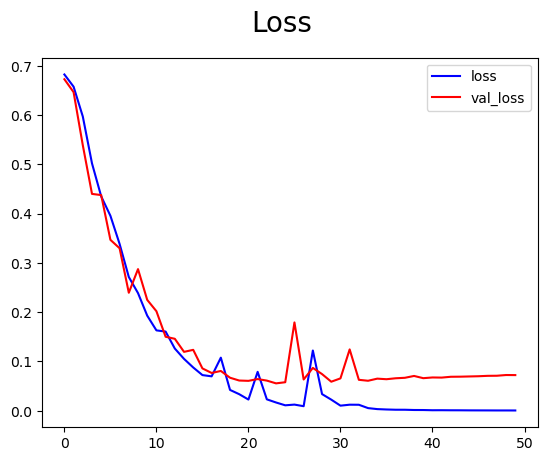

In [15]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

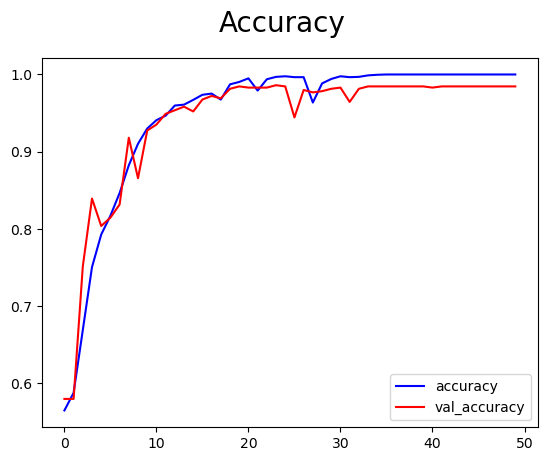

In [16]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [17]:
model.save("modelSGDOpt.h5")

In [18]:
# from keras import models
# model = models.load_model("modelSGDOpt.h5")

In [19]:
# y_pred = model.predict(X_test)